# BrainWeb-based multimodal models of 20 normal brains

This project was initially inspired by "[BrainWeb: 20 Anatomical Models of 20 Normal Brains][RawData]."

However there are a number of generally useful tools, image processing & display functions included in this project. For example, this includes `volshow()` for interactive comparison of multiple 3D volumes, `get_file()` for caching data URLs, and `register()` for image coregistration.

[![PyPI]][PyPI-target]|[![CI]][CI-target]|[![Quality]][Quality-target]|[![DOI]][DOI-target]|[![LICENCE]][LICENCE-target]
-|-|-|-|-

**Download and Preprocessing for PET-MR Simulations**

This notebook will not re-download/re-process files if they already exist.

- Output data
    + `~/.brainweb/subject_*.npz`: dtype(shape): `float32(127, 344, 344)`

- [Raw data source][RawData]
    + `~/.brainweb/subject_*.bin.gz`: dtype(shape): `uint16(362, 434, 362)`

- Install
    + `pip install brainweb`

----

- Author: Casper da Costa-Luis <<casper.dcl@physics.org>>
- Date: 2017-2020
- Licence: [MPLv2.0](https://www.mozilla.org/MPL/2.0)

[RawData]: http://brainweb.bic.mni.mcgill.ca/brainweb/anatomic_normal_20.html
[PyPI]: https://img.shields.io/pypi/v/brainweb.svg
[PyPI-target]: https://pypi.org/project/brainweb
[CI]: https://travis-ci.org/casperdcl/brainweb.svg?branch=master
[CI-target]: https://travis-ci.org/casperdcl/brainweb
[Quality]: https://api.codacy.com/project/badge/Grade/cdad13693b0141199c31d5b44c7ab185
[Quality-target]: https://www.codacy.com/app/casper-dcl/brainweb
[DOI]: https://zenodo.org/badge/DOI/10.5281/zenodo.3269888.svg
[DOI-target]: https://doi.org/10.5281/zenodo.3269888
[LICENCE]: https://img.shields.io/pypi/l/brainweb.svg?label=licence
[LICENCE-target]: https://www.mozilla.org/MPL/2.0

In [2]:
from __future__ import print_function, division
%matplotlib inline
import brainweb
from brainweb import volshow
import numpy as np
from os import path
from tqdm.auto import tqdm
import logging
logging.basicConfig(level=logging.INFO)

## Raw Data

In [3]:
# download
files = brainweb.get_files()

# read last file
data = brainweb.load_file(files[-1])

# show last subject
print(files[-1])


BrainWeb Subjects:   0%|          | 0/20 [00:00<?, ?file/s]

/home/alhajhemidi/.brainweb/subject_54.bin.gz


In [4]:
volshow(data, cmaps=['gist_ncar']);

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=181, description='z', max=361), Output()), _dom_classes=('widget-interac…

## Transform

<div style="visibility: hidden">$\ifcsname bm\endcsname\else\newcommand{\bm}[1]{\mathbf{#1}}\fi$</div>
Convert raw image data:

- Siemens Biograph mMR resolution (~2mm) & dimensions (127, 344, 344)
- PET/T1/T2/uMap intensities
  + PET defaults to FDG intensity ratios; could use e.g. Amyloid instead
- randomised structure for PET/T1/T2
  + $\bm{\theta} \circ (\bm{1} + \gamma[2G_\sigma(\bm{\rho}) - \bm{1}])$
    * $\bm{\rho} = rand(127, 344, 344) \in [0, 1)$
    * Gaussian smoothing $\sigma = 1$
    * $\gamma = \left\{\matrix{1 & \text{for PET}\\ 0.75 & \text{for MR}}\right.$
    * $\bm{\theta}$ is the PET or MR piecewise constant phantom

In [6]:
# show region probability masks
PetClass = brainweb.FDG
label_probs = brainweb.get_label_probabilities(files[-1], labels=PetClass.all_labels)
volshow(label_probs[brainweb.trim_zeros_ROI(label_probs)], titles=PetClass.all_labels, frameon=False);

BrainWeb labels:   0%|          | 0/12 [00:00<?, ?label/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=44, description='z', max=88), Output()), _dom_classes=('widget-interact'…

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

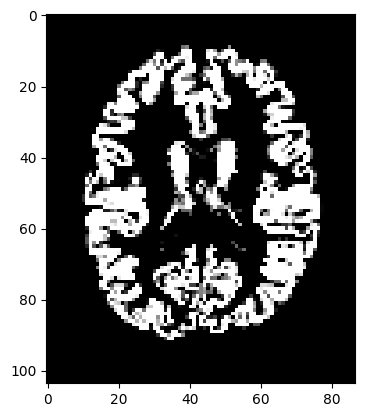

In [7]:
from matplotlib import pyplot as plt
plt.imshow(label_probs[brainweb.trim_zeros_ROI(label_probs)][2, 45, :], cmap='gray');

In [9]:
csf_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][1, 45, :]
gray_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][2, 45, :]
white_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][3, 45, :]
fat_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][4, 45, :]
muscle_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][5, 45, :]
skin_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][6, 45, :]
skull_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][7, 45, :]
vessels_label = label_probs[brainweb.trim_zeros_ROI(label_probs)][8, 45, :]


Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

Trimming ROI:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_136322/4091589966.py:17: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


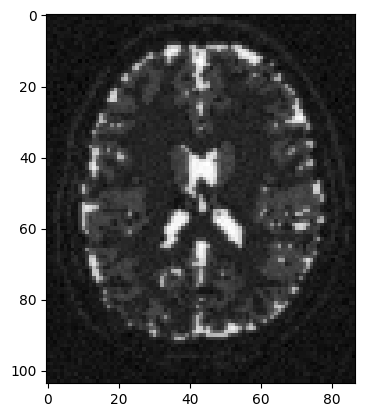

In [13]:
image = np.zeros_like(vessels_label)
gray_value = brainweb.T2.greyMatter
white_value = brainweb.T2.whiteMatter
csf_value = brainweb.T2.csf
fat_value = brainweb.T2.fat
muscle_value = brainweb.T2.muscle
skin_value = brainweb.T2.skin
skull_value = brainweb.T2.skull
vessels_value = brainweb.T2.vessels

image[csf_label == 1.0] = 100 * np.exp(- (200/csf_value))
image[gray_label == 1.0] = 70 * np.exp(- (200/gray_value))
image[white_label == 1.0] = 60 * np.exp(- (200/white_value))
image[skin_label == 1.0] = 95 * np.exp(- (200/skin_value))
image[skull_label == 1.0] = 10 * np.exp(- (200/skull_value))
image[vessels_label == 1.0] = 85 * np.exp(- (200/vessels_value))
from scipy.ndimage.filters import gaussian_filter
image = gaussian_filter(image, sigma=0.6) + np.random.normal(0, 1.0, image.shape)

plt.imshow(image, cmap='gray')


In [5]:
brainweb.seed(1337)

for f in tqdm(files, desc="mMR ground truths", unit="subject"):
    vol = brainweb.get_mmr_fromfile(
        f,
        petNoise=1, t1Noise=0.75, t2Noise=0.75,
        petSigma=1, t1Sigma=1, t2Sigma=1,
        PetClass=PetClass)

mMR ground truths:   0%|          | 0/20 [00:00<?, ?subject/s]

In [14]:
# show last subject
print(files[1])
volshow([vol['PET' ][:, 100:-100, 100:-100],
         vol['uMap'][:, 100:-100, 100:-100],
         vol['T1'  ][:, 100:-100, 100:-100],
         vol['T2'  ][:, 100:-100, 100:-100]],
        cmaps=['hot', 'bone', 'Greys_r', 'Greys_r'],
        titles=["PET", "uMap", "T1", "T2"],
        frameon=False);

/home/alhajhemidi/.brainweb/subject_05.bin.gz


Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=63, description='z', max=126), Output()), _dom_classes=('widget-interact…

In [13]:
# add some lesions
brainweb.seed(2000)
im3d = brainweb.add_lesions(vol['T2'])
volshow(im3d[:, 100:-100, 100:-100], cmaps=['Greys_r']);

Output()

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=63, description='z', max=126), Output()), _dom_classes=('widget-interact…

In [8]:
# bonus: use brute-force registration to transform
#!pip install -U 'brainweb[register]'
reg = brainweb.register(
    data[:, ::-1], target=vol['PET'],
    src_resolution=brainweb.Res.brainweb,
    target_resolution=brainweb.Res.mMR)

volshow({
    "PET":    vol['PET'][:, 100:-100, 100:-100],
    "RawReg": reg[       :, 100:-100, 100:-100],
    "T1":     vol['T1' ][:, 100:-100, 100:-100],
}, cmaps=['hot', 'gist_ncar', 'Greys_r'], ncols=3, tight_layout=5, figsize=(9.5, 3.5), frameon=False);

ModuleNotFoundError: No module named 'dipy'